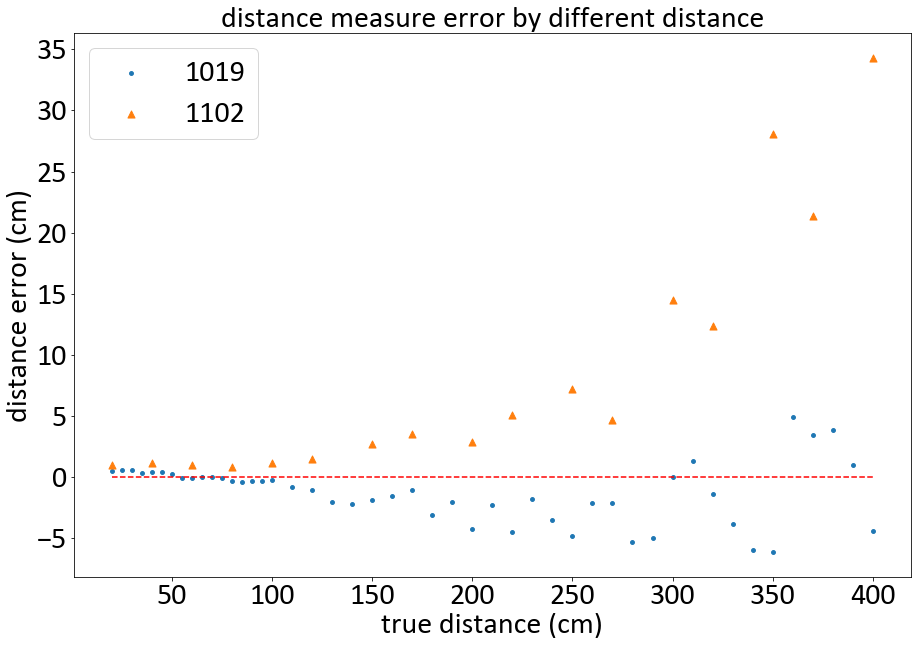

In [22]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np
from numpy import *

with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    logs_non_blank_line = [i for i in logs if i != '']
with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data_GT.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    gt_non_blank_line = [i for i in logs if i != '']
gt = gt_non_blank_line[0].split(",")
gt = [int(i) for i in gt]
estimated = []
for i in range(0, len(logs_non_blank_line), 2):
    estimated.append(float(logs_non_blank_line[i + 1]) * 100)
diff = [estimated[i] - gt[i] for i in range(len(gt))]

# #################1102
gt_1102 = [20, 40, 60, 80, 100, 120, 150, 170, 200, 220, 250, 270, 300, 320, 350, 370, 400]
measured_1102 = [
    [0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21],
    [0.41098, 0.411, 0.41086, 0.41102, 0.411, 0.41098, 0.411, 0.4109, 0.41098, 0.41095],
    [0.60964, 0.60961, 0.61, 0.61036, 0.6096, 0.61, 0.61, 0.60978, 0.61009, 0.60949],
    [0.80881, 0.808, 0.80863, 0.80739, 0.80972, 0.80868, 0.80796, 0.808, 0.80892, 0.80767],
    [1.00888, 1.0132, 1.01102, 1.01058, 1.01338, 1.01348, 1.00952, 1.01174, 1.0101, 1.01094],
    [1.21263, 1.21074, 1.21209, 1.21764, 1.215, 1.215, 1.21509, 1.21827, 1.21917, 1.21353],
    [1.52326, 1.52264, 1.52908, 1.52948, 1.54215, 1.52359, 1.51277, 1.5248, 1.524, 1.53935],
    [1.73916, 1.732, 1.7329, 1.74118, 1.73068, 1.72846, 1.73855, 1.74948, 1.72558, 1.7335],
    [2.041281, 2.035921, 2.052101, 2.044471, 2.024801, 2.030401, 2.021681, 1.99174, 2.022161, 2.02],
    [2.228601, 2.253401, 2.235441, 2.299001, 2.218301, 2.246431, 2.285841, 2.221501, 2.270331, 2.246281],
    [2.587611, 2.602361, 2.549161, 2.565541, 2.574771, 2.578281, 2.565021, 2.564041, 2.573401, 2.556561],
    [2.740451, 2.772851, 2.741951, 2.747501, 2.735801, 2.741951, 2.721621, 2.740911, 2.765651, 2.753651],
    [3.117901, 3.218461, 3.156001, 3.195231, 3.109131, 3.097731, 3.159011, 3.172431, 3.147941, 3.074371],
    [3.294721, 3.341101, 3.333111, 3.386951, 3.311171, 3.361621, 3.278911, 3.331581, 3.293401, 3.301741],
    [3.819091, 3.786081, 3.794341, 3.765681, 3.746141, 3.738481, 3.800861, 3.752241, 3.826261, 3.776801],
    [3.977001, 3.885761, 3.870291, 3.955301, 3.916741, 3.924401, 3.875831, 3.891041, 3.914831, 3.924781],
    [4.469441, 4.352041, 4.348601, 4.312231, 4.256651, 4.262791, 4.395911, 4.432121, 4.273471, 4.327361]
]
measured_1102_mean = [mean(i) * 100 for i in measured_1102]
diff_1102 = [measured_1102_mean[i] - gt_1102[i] for i in range(len(gt_1102))]

# 创建figure窗口，figsize设置窗口的大小
plt.rcParams['figure.figsize'] = (15, 10)  # 单位是inches
# fig, axs = plt.subplots(2, 1)
# x y 标注
plt.ylabel('distance error (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.xlabel('true distance (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.title(f"distance measure error by different distance", fontdict={'family': 'Calibri', 'size': 30})
# 设置坐标轴范围
# plt.xlim((1, 5.7))
# plt.ylim((40, 90))
# 坐标轴取点间隔
# my_x_ticks = np.arange(0, 6, 1)
# my_y_ticks = np.arange(0.5, 0.9, 0.1)
# 坐标轴字体

plt.xticks(fontproperties='Calibri', size=30)
plt.yticks(fontproperties='Calibri', size=30)
# plt.xticks([1.3, 2.3, 3.3, 4.3, 5.3], [r'$n$', r'$s$', r'$m$', r'$l$', r'$x$'], size=25)

plt.scatter(gt, diff, label='1019', s=15, marker="o")
plt.scatter(gt_1102, diff_1102, label='1102', s=50, marker="^")
plt.hlines(0, 20, 400, colors="r", linestyles="dashed")

plt.legend(prop={'family': 'Calibri', 'size': 30})
plt.show()

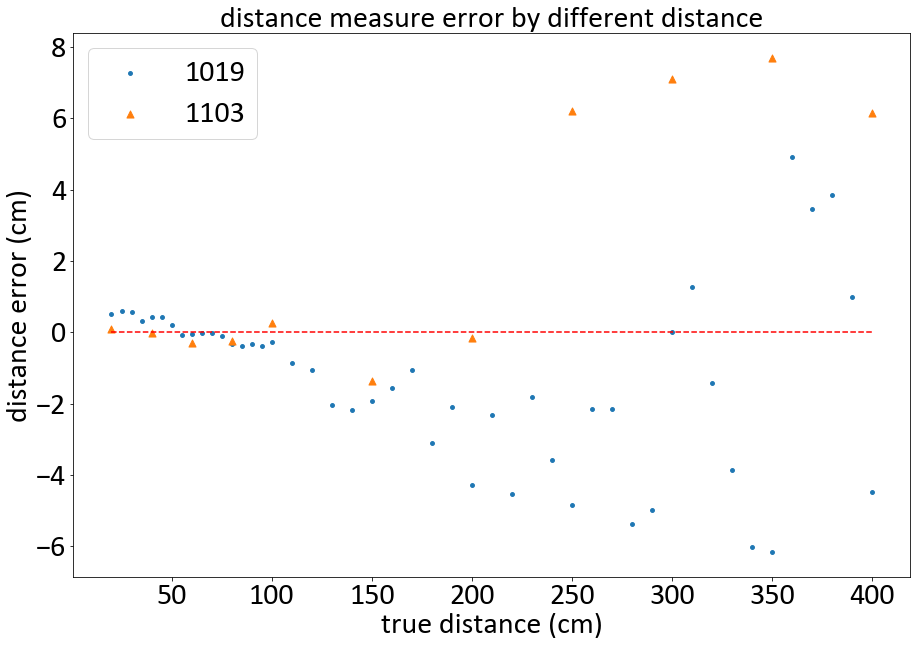

In [8]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np
from numpy import *

with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    logs_non_blank_line = [i for i in logs if i != '']
with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data_GT.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    gt_non_blank_line = [i for i in logs if i != '']
gt = gt_non_blank_line[0].split(",")
gt = [int(i) for i in gt]
estimated = []
for i in range(0, len(logs_non_blank_line), 2):
    estimated.append(float(logs_non_blank_line[i + 1]) * 100)
# diff = [abs(estimated[i] - gt[i]) for i in range(len(gt))]
diff = [estimated[i] - gt[i] for i in range(len(gt))]

# #################1102
gt_1102 = [20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400]
measured_1102 = [
    [0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201],
    [0.4, 0.39964, 0.4, 0.3996, 0.4, 0.3996, 0.4, 0.4, 0.4, 0.4, 0.4, 0.39984, 0.3996, 0.40004, 0.40006, 0.4, 0.4, 0.4, 0.4, 0.4],
    [0.597, 0.59654, 0.59647, 0.59659, 0.597, 0.597, 0.59639, 0.597, 0.597, 0.597, 0.597, 0.597, 0.59688, 0.597, 0.597, 0.59706, 0.59706, 0.59697, 0.597, 0.597],
    [0.7974, 0.79765, 0.79802, 0.79789, 0.79791, 0.79767, 0.79796, 0.79792, 0.79753, 0.79753, 0.79738, 0.79777, 0.79765, 0.79756, 0.79761, 0.79761, 0.7977, 0.79712, 0.79767,
     0.79846],
    [1.00212, 1.00122, 1.00264, 1.0027, 1.00212, 1.00222, 1.00324, 1.0027, 1.00282, 1.00324, 1.00136, 1.00224, 1.00204, 1.00346, 1.0041, 1.00294, 1.00222, 1.00368, 1.00186,
     1.00184],
    [1.48736, 1.488, 1.488, 1.488, 1.4848, 1.488, 1.48244, 1.488, 1.484, 1.488, 1.48376, 1.4842, 1.48448, 1.484, 1.48776, 1.488, 1.48664, 1.4864, 1.4888, 1.488],
    [2.004, 2.00256, 1.99516, 2.00208, 2.00064, 1.99207, 1.99101, 1.9945, 1.99138, 1.99494, 2.0016, 1.99968, 2, 2.004, 2.004, 1.996, 1.99752, 2.004, 1.99166, 2.004],
    [2.55735, 2.56476, 2.5788, 2.56593, 2.558, 2.545, 2.571, 2.57243, 2.55501, 2.55826, 2.56775, 2.558, 2.56112, 2.5632, 2.558, 2.558, 2.56047, 2.55371, 2.56281, 2.56983],
    [3.07042, 3.0796, 3.04696, 3.0537, 3.06301, 3.07744, 3.0778, 3.07254, 3.08738, 3.06576, 3.067, 3.05104, 3.07215, 3.0706, 3.07546, 3.08942, 3.0769, 3.0679, 3.085, 3.06772],
    [3.5615, 3.6205, 3.61416, 3.53745, 3.53146, 3.5565, 3.46828, 3.59154, 3.58175, 3.58575, 3.46758, 3.58625, 3.623, 3.61298, 3.62078, 3.662, 3.5865, 3.52599, 3.65062, 3.55385],
    [3.9929, 4.05187, 4.05088, 4.05478, 4.08636, 4.07596, 4.04518, 4.06304, 4.04192, 4.12778, 4.08732, 4.03552, 4.0741, 4.07071, 4.10447, 4.09194, 4.01705, 4.0679, 4.0279, 4.05928]
]
measured_1102_mean = [mean(i) * 100 for i in measured_1102]
# diff_1102 = [abs(measured_1102_mean[i] - gt_1102[i]) for i in range(len(gt_1102))]
diff_1102 = [measured_1102_mean[i] - gt_1102[i] for i in range(len(gt_1102))]

# 创建figure窗口，figsize设置窗口的大小
plt.rcParams['figure.figsize'] = (15, 10)  # 单位是inches
# fig, axs = plt.subplots(2, 1)
# x y 标注
plt.ylabel('distance error (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.xlabel('true distance (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.title(f"distance measure error by different distance", fontdict={'family': 'Calibri', 'size': 30})
# 设置坐标轴范围
# plt.xlim((1, 5.7))
# plt.ylim((40, 90))
# 坐标轴取点间隔
# my_x_ticks = np.arange(0, 6, 1)
# my_y_ticks = np.arange(0.5, 0.9, 0.1)
# 坐标轴字体

plt.xticks(fontproperties='Calibri', size=30)
plt.yticks(fontproperties='Calibri', size=30)
# plt.xticks([1.3, 2.3, 3.3, 4.3, 5.3], [r'$n$', r'$s$', r'$m$', r'$l$', r'$x$'], size=25)

plt.scatter(gt, diff, label='1019', s=15, marker="o")
plt.scatter(gt_1102, diff_1102, label='1103', s=50, marker="^")
plt.hlines(0, 20, 400, colors="r", linestyles="dashed")

plt.legend(prop={'family': 'Calibri', 'size': 30})
plt.show()

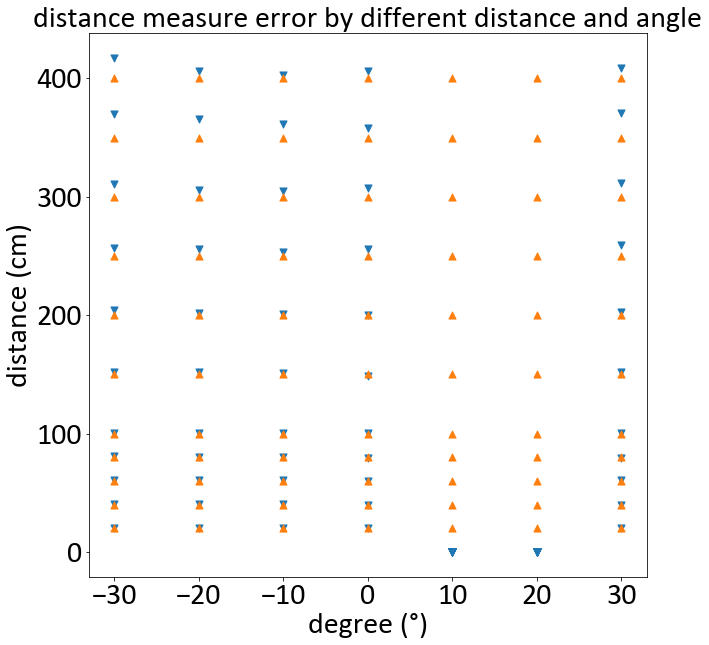

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

degree_0_raw = [
    [0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201],
    [0.4, 0.39964, 0.4, 0.3996, 0.4, 0.3996, 0.4, 0.4, 0.4, 0.4, 0.4, 0.39984, 0.3996, 0.40004, 0.40006, 0.4, 0.4, 0.4, 0.4, 0.4],
    [0.597, 0.59654, 0.59647, 0.59659, 0.597, 0.597, 0.59639, 0.597, 0.597, 0.597, 0.597, 0.597, 0.59688, 0.597, 0.597, 0.59706, 0.59706, 0.59697, 0.597, 0.597],
    [0.7974, 0.79765, 0.79802, 0.79789, 0.79791, 0.79767, 0.79796, 0.79792, 0.79753, 0.79753, 0.79738, 0.79777, 0.79765, 0.79756, 0.79761, 0.79761, 0.7977, 0.79712, 0.79767,
     0.79846],
    [1.00212, 1.00122, 1.00264, 1.0027, 1.00212, 1.00222, 1.00324, 1.0027, 1.00282, 1.00324, 1.00136, 1.00224, 1.00204, 1.00346, 1.0041, 1.00294, 1.00222, 1.00368, 1.00186,
     1.00184],
    [1.48736, 1.488, 1.488, 1.488, 1.4848, 1.488, 1.48244, 1.488, 1.484, 1.488, 1.48376, 1.4842, 1.48448, 1.484, 1.48776, 1.488, 1.48664, 1.4864, 1.4888, 1.488],
    [2.004, 2.00256, 1.99516, 2.00208, 2.00064, 1.99207, 1.99101, 1.9945, 1.99138, 1.99494, 2.0016, 1.99968, 2, 2.004, 2.004, 1.996, 1.99752, 2.004, 1.99166, 2.004],
    [2.55735, 2.56476, 2.5788, 2.56593, 2.558, 2.545, 2.571, 2.57243, 2.55501, 2.55826, 2.56775, 2.558, 2.56112, 2.5632, 2.558, 2.558, 2.56047, 2.55371, 2.56281, 2.56983],
    [3.07042, 3.0796, 3.04696, 3.0537, 3.06301, 3.07744, 3.0778, 3.07254, 3.08738, 3.06576, 3.067, 3.05104, 3.07215, 3.0706, 3.07546, 3.08942, 3.0769, 3.0679, 3.085, 3.06772],
    [3.5615, 3.6205, 3.61416, 3.53745, 3.53146, 3.5565, 3.46828, 3.59154, 3.58175, 3.58575, 3.46758, 3.58625, 3.623, 3.61298, 3.62078, 3.662, 3.5865, 3.52599, 3.65062, 3.55385],
    [3.9929, 4.05187, 4.05088, 4.05478, 4.08636, 4.07596, 4.04518, 4.06304, 4.04192, 4.12778, 4.08732, 4.03552, 4.0741, 4.07071, 4.10447, 4.09194, 4.01705, 4.0679, 4.0279, 4.05928]
]
degree_0_mean = [mean(i) * 100 for i in degree_0_raw]

degree_30_raw = [
    [0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204, 0.204],
    [0.40124, 0.40115, 0.40145, 0.401, 0.401, 0.40106, 0.4013, 0.401, 0.401, 0.401, 0.40136, 0.401, 0.401, 0.401, 0.401, 0.401, 0.401, 0.4013, 0.401, 0.40136],
    [0.60561, 0.6052, 0.6053, 0.6061, 0.60656, 0.60512, 0.60503, 0.60548, 0.60508, 0.60602, 0.605, 0.60556, 0.60536, 0.605, 0.60533, 0.60588, 0.60596, 0.60516, 0.6051, 0.605],
    [0.79679, 0.79574, 0.79527, 0.798, 0.79647, 0.79809, 0.79622, 0.7946, 0.79727, 0.79833, 0.79682, 0.7952, 0.79736, 0.79697, 0.79565, 0.79572, 0.79451, 0.79421, 0.79745,
     0.79566],
    [1.00384, 1.0036, 1.00234, 1.004, 1.00448, 1.00176, 1.00406, 1.00466, 1.00396, 1.00324, 1.00412, 1.00436, 1.00288, 1.004, 1.00596, 1.00324, 1.00448, 1.004, 1.00406, 1.00276],
    [1.50744, 1.52853, 1.52987, 1.51028, 1.51812, 1.52258, 1.51765, 1.50935, 1.5293, 1.5166, 1.52383, 1.5069, 1.52027, 1.51488, 1.52275, 1.5204, 1.50635, 1.50855, 1.50116, 1.5245],
    [2.0324, 2.03504, 2.03112, 2.03512, 2.03408, 2.00984, 2.04232, 2.04232, 2.02656, 2.00296, 2.03448, 2.03867, 2.01888, 2.0416, 2.03824, 2.03288, 2.03456, 2.0292, 2.02584,
     2.0348],
    [2.58686, 2.59559, 2.60288, 2.604, 2.59985, 2.59517, 2.55644, 2.59619, 2.62296, 2.58478, 2.5866, 2.58972, 2.59639, 2.584, 2.584, 2.59284, 2.59986, 2.56502, 2.5998, 2.61204],
    [3.09716, 3.09393, 3.13862, 3.0742, 3.09678, 3.11692, 3.11274, 3.11654, 3.08861, 3.13938, 3.11464, 3.1059, 3.10438, 3.14166, 3.1574, 3.12053, 3.10535, 3.0983, 3.10134,
     3.12758],
    [3.66281, 3.6877, 3.70412, 3.70088, 3.77688, 3.70007, 3.68927, 3.69818, 3.71978, 3.74421, 3.69737, 3.65936, 3.69008, 3.75504, 3.68954, 3.64016, 3.75196, 3.743, 3.69305,
     3.72842],
    [4.113, 4.11996, 4.1186, 4.1288, 4.07449, 4.11631, 4.11835, 4.19061, 4.03618, 4.03405, 4.12064, 4.1101, 4.09128, 4.01642, 4.06721, 4.05647, 4.024, 4.05472, 4.0574, 4.08117]
]
degree_30_mean = [mean(i) * 100 for i in degree_30_raw]

degree_N_30_raw = [
    [0.20462, 0.20475, 0.20475, 0.20459, 0.20451, 0.20456, 0.20465, 0.20471, 0.20443, 0.20441, 0.20459, 0.20422, 0.20416, 0.20447, 0.20465, 0.20447, 0.20475, 0.20466, 0.20475,
     0.20428],
    [0.40903, 0.40946, 0.409, 0.409, 0.409, 0.409, 0.409, 0.409, 0.409, 0.409, 0.409, 0.409, 0.4097, 0.409, 0.409, 0.40998, 0.409, 0.409, 0.409, 0.409],
    [0.60721, 0.607, 0.60661, 0.60688, 0.60667, 0.60688, 0.60694, 0.607, 0.60691, 0.60596, 0.60688, 0.60679, 0.60688, 0.60721, 0.607, 0.60596, 0.60693, 0.607, 0.60666, 0.60688],
    [0.81227, 0.81326, 0.81434, 0.81116, 0.81334, 0.81178, 0.81227, 0.81142, 0.81326, 0.81301, 0.81283, 0.81278, 0.81289, 0.812, 0.81584, 0.81242, 0.81208, 0.81251, 0.81468,
     0.81244],
    [1.00858, 1.00836, 1.00842, 1.00984, 1.0083, 1.00716, 1.01072, 1.00682, 1.00808, 1.0114, 1.00888, 1.00868, 1.00844, 1.008, 1.00858, 1.01042, 1.00876, 1.00904, 1.00602,
     1.01074],
    [1.5172, 1.52976, 1.53405, 1.5185, 1.51743, 1.52928, 1.5298, 1.522, 1.52092, 1.53301, 1.533, 1.52028, 1.5359, 1.5311, 1.52553, 1.5067, 1.52714, 1.52225, 1.50614, 1.5237],
    [2.03776, 2.04328, 2.03472, 2.03312, 2.0542, 2.0558, 2.04124, 2.04634, 2.0428, 2.03384, 2.044, 2.03296, 2.04643, 2.03632, 2.05111, 2.04841, 2.0288, 2.04544, 2.03248, 2.03848],
    [2.57139, 2.55216, 2.58998, 2.597, 2.55397, 2.58982, 2.5402, 2.57191, 2.57633, 2.56177, 2.58608, 2.52196, 2.56294, 2.55644, 2.56762, 2.55813, 2.57308, 2.58283, 2.54578,
     2.55423],
    [3.13961, 3.12547, 3.0728, 3.104, 3.10552, 3.10932, 3.06268, 3.09497, 3.13136, 3.07456, 3.13345, 3.1325, 3.11673, 3.0924, 3.14069, 3.09231, 3.10248, 3.104, 3.1173, 3.1654],
    [3.66471, 3.5978, 3.66553, 3.75358, 3.76445, 3.74002, 3.76193, 3.67975, 3.69279, 3.56315, 3.75609, 3.77433, 3.69469, 3.76472, 3.73489, 3.73635, 3.61897, 3.72366, 3.61638,
     3.75457],
    [4.05057, 4.1577, 4.14444, 4.20202, 4.16144, 4.15159, 4.29096, 4.20104, 4.20295, 4.18805, 4.122, 4.13424, 4.23687, 4.18898, 4.24615, 4.18218, 4.10942, 4.13696, 4.18899,
     4.15737]
]
degree_N_30_mean = [mean(i) * 100 for i in degree_N_30_raw]

degree_N_20_raw = [
    [0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.20721, 0.20745, 0.20745, 0.20724, 0.2073, 0.20712, 0.20724, 0.20745, 0.20712, 0.207, 0.20709, 0.20745, 0.2073],
    [0.40859, 0.40853, 0.40853, 0.4088, 0.40816, 0.40859, 0.40856, 0.4085, 0.4084, 0.4084, 0.4088, 0.4088, 0.40882, 0.40816, 0.4088, 0.4088, 0.40859, 0.40853, 0.4085, 0.40859],
    [0.6065, 0.60667, 0.607, 0.6065, 0.60581, 0.607, 0.60586, 0.60533, 0.60582, 0.60611, 0.60607, 0.60643, 0.60614, 0.60667, 0.606, 0.6059, 0.60614, 0.6062, 0.60626, 0.60652],
    [0.8083, 0.8059, 0.80528, 0.8059, 0.8065, 0.80572, 0.80725, 0.80657, 0.80596, 0.80652, 0.80513, 0.80536, 0.8075, 0.80676, 0.80723, 0.80668, 0.80699, 0.80709, 0.8059, 0.80484],
    [1.00428, 1.00466, 1.00298, 1.00428, 1.00374, 1.0064, 1.005, 1.00338, 1.00408, 1.00428, 1.0049, 1.00356, 1.0049, 1.005, 1.00636, 1.00476, 1.00312, 1.00286, 1.0044, 1.0044],
    [1.5082, 1.51703, 1.52005, 1.51536, 1.52008, 1.5238, 1.52066, 1.51848, 1.51538, 1.52727, 1.5137, 1.5243, 1.5216, 1.52104, 1.5163, 1.50536, 1.511, 1.51703, 1.52425, 1.52893],
    [2.01744, 2.024, 2.03576, 2.01872, 2.01504, 2.002, 2.01368, 2.02104, 2.01632, 2.01856, 2.02624, 2.0096, 2.01792, 2.02544, 2.01136, 2.00976, 2.028, 2.01888, 2.0108, 2.01616],
    [2.5476, 2.5502, 2.54457, 2.53324, 2.54496, 2.54283, 2.57022, 2.56008, 2.57022, 2.54522, 2.5697, 2.55319, 2.54825, 2.58192, 2.55462, 2.56866, 2.54202, 2.57035, 2.54955,
     2.55527],
    [3.0499, 3.03, 3.039, 3.03468, 3.067, 3.04413, 3.06831, 3.06954, 3.05161, 3.05237, 3.0613, 3.04829, 3.06584, 3.11559, 3.06966, 3.07854, 3.05788, 3.03558, 3.04278, 3.03684],
    [3.67901, 3.62066, 3.62614, 3.62672, 3.69899, 3.63993, 3.64831, 3.6597, 3.64681, 3.73922, 3.65883, 3.56278, 3.65071, 3.63964, 3.64545, 3.66235, 3.69143, 3.66039, 3.65455,
     3.66325],
    [4.05609, 4.139, 4.0416, 4.105, 4.10542, 4.07303, 4.0017, 4.06252, 4.04192, 4.10563, 4.07039, 3.98041, 4.06993, 4.03205, 4.08883, 4.0304, 4.02272, 3.99232, 4.15056, 4.06016]
]
degree_N_20_mean = [mean(i) * 100 for i in degree_N_20_raw]

degree_N_10_raw = [
    [0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207, 0.207],
    [0.4076, 0.40734, 0.4071, 0.40702, 0.408, 0.40719, 0.40739, 0.407, 0.4075, 0.40744, 0.4076, 0.40779, 0.40763, 0.40756, 0.4078, 0.40738, 0.40776, 0.408, 0.40759, 0.40711],
    [0.606, 0.607, 0.607, 0.60697, 0.607, 0.607, 0.60697, 0.607, 0.60707, 0.607, 0.607, 0.60694, 0.60744, 0.607, 0.6069, 0.60674, 0.607, 0.60688, 0.607, 0.60674],
    [0.80541, 0.807, 0.80713, 0.80636, 0.80702, 0.8064, 0.807, 0.80741, 0.80711, 0.80652, 0.80682, 0.80622, 0.80693, 0.80622, 0.80646, 0.80821, 0.80699, 0.80711, 0.80594, 0.807],
    [1.0076, 1.00394, 1.0064, 1.00442, 1.00486, 1.00632, 1.0064, 1.00584, 1.00446, 1.0059, 1.0043, 1.0053, 1.00514, 1.00656, 1.00594, 1.00692, 1.00736, 1.00518, 1.00542, 1.00692],
    [1.50607, 1.50326, 1.50826, 1.51647, 1.51444, 1.51641, 1.50873, 1.50576, 1.50705, 1.5143, 1.50527, 1.50925, 1.501, 1.51186, 1.51162, 1.5131, 1.51056, 1.50953, 1.5041, 1.52016],
    [2.01096, 2.0092, 2.02032, 2.01496, 2.01272, 2.00704, 2.01032, 2.02224, 2.01104, 2.01032, 2.00608, 2.01616, 2.0112, 1.98914, 2.004, 2.01032, 2.01536, 2.0096, 2.008, 2.008],
    [2.53492, 2.54079, 2.53396, 2.52, 2.52455, 2.53027, 2.5513, 2.5342, 2.53792, 2.53087, 2.53066, 2.5372, 2.53648, 2.50318, 2.5632, 2.55475, 2.53806, 2.52065, 2.51765, 2.55085],
    [3.0426, 3.04867, 3.03684, 3.06772, 3.05408, 3.06586, 3.0568, 3.07096, 3.0613, 3.0706, 3.067, 3.067, 3.03576, 3.03342, 3.04895, 3.04152, 3.012, 3.05104, 3.04622, 3.05617],
    [3.6863, 3.60556, 3.70412, 3.55425, 3.5505, 3.57575, 3.60129, 3.57025, 3.5805, 3.6243, 3.5705, 3.71195, 3.56642, 3.70331, 3.57275, 3.61286, 3.51825, 3.689, 3.61598, 3.59538],
    [4.01962, 4.0178, 4.03488, 4.03808, 4.02342, 3.977, 4.02575, 4.03072, 4.02432, 4.03808, 3.977, 4.0576, 4.13152, 4.04352, 4.03712, 3.94662, 4.01984, 4.04256, 4.03648, 4.01568]
]
degree_N_10_mean = [mean(i) * 100 for i in degree_N_10_raw]

degree_30 = [30 for i in range(len(degree_30_mean))]
degree_20 = [20 for i in range(len(degree_30_mean))]
degree_10 = [10 for i in range(len(degree_30_mean))]
degree_0 = [0 for i in range(len(degree_30_mean))]
degree_N_10 = [-10 for i in range(len(degree_30_mean))]
degree_N_20 = [-20 for i in range(len(degree_30_mean))]
degree_N_30 = [-30 for i in range(len(degree_30_mean))]
gt_1103 = [20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400]
None_measure = [0 for i in range(len(degree_30_mean))]

plt.rcParams['figure.figsize'] = (10, 10)  # 单位是inches
plt.ylabel('distance (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.xlabel('degree (°)', fontdict={'family': 'Calibri', 'size': 30})
plt.title(f"distance measure error by different distance and angle", fontdict={'family': 'Calibri', 'size': 30})
plt.xticks(fontproperties='Calibri', size=30)
plt.yticks(fontproperties='Calibri', size=30)

plt.scatter(degree_30, degree_30_mean, s=50, marker="v", color='#1f77b4')
plt.scatter(degree_30, gt_1103, s=50, marker="^", color='#ff7f0e')
plt.scatter(degree_20, None_measure, s=50, marker="v", color='#1f77b4')
plt.scatter(degree_20, gt_1103, s=50, marker="^", color='#ff7f0e')
plt.scatter(degree_10, None_measure, s=50, marker="v", color='#1f77b4')
plt.scatter(degree_10, gt_1103, s=50, marker="^", color='#ff7f0e')
plt.scatter(degree_0, degree_0_mean, s=50, marker="v", color='#1f77b4')
plt.scatter(degree_0, gt_1103, s=50, marker="^", color='#ff7f0e')
plt.scatter(degree_N_10, degree_N_10_mean, s=50, marker="v", color='#1f77b4')
plt.scatter(degree_N_10, gt_1103, s=50, marker="^", color='#ff7f0e')
plt.scatter(degree_N_20, degree_N_20_mean, s=50, marker="v", color='#1f77b4')
plt.scatter(degree_N_20, gt_1103, s=50, marker="^", color='#ff7f0e')
plt.scatter(degree_N_30, degree_N_30_mean, s=50, marker="v", color='#1f77b4')
plt.scatter(degree_N_30, gt_1103, s=50, marker="^", color='#ff7f0e')

# plt.legend(prop={'family': 'Calibri', 'size': 30})
plt.show()

KeyboardInterrupt: 